<a href="https://colab.research.google.com/github/JuannMontoya/PDI_2025_2/blob/main/Parcial_1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

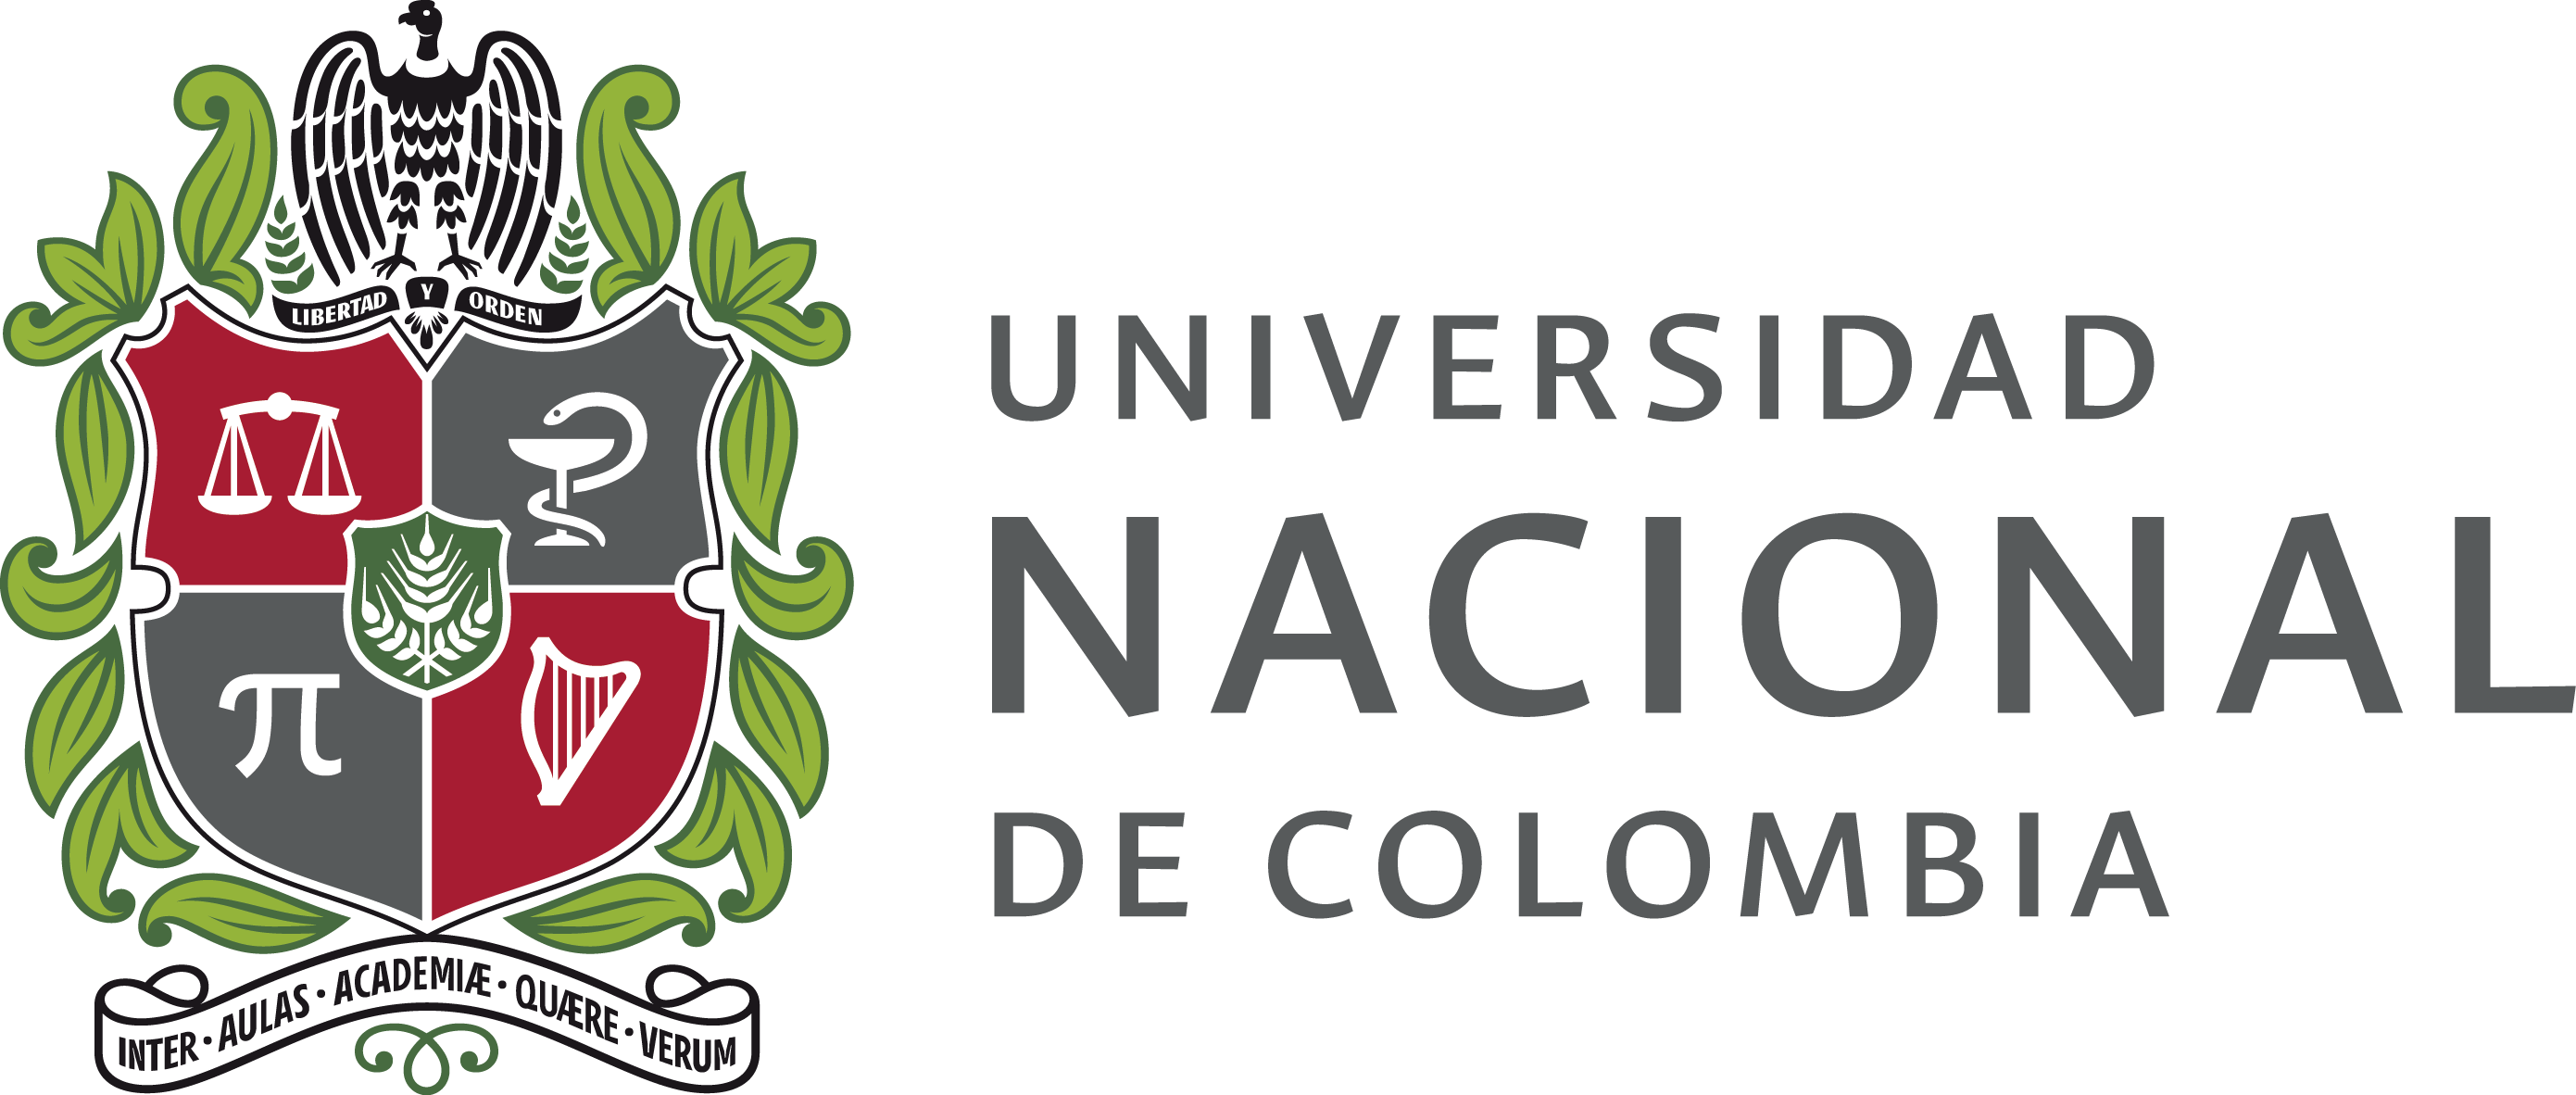
### **Universidad Nacional de Colombia sede Manizales**
#### Facultad de ingeniería y arquitectura
#### Departamento de ingeniería eléctrica, electrónica y computación
#### *Procesamiento digital de imágenes*

#### Profesor: Lucas Iturriago

## Parcial 1 Procesamiento Digital de Imágenes

Instrucciones:
* Lea atentamente cada punto antes de comenzar.
* Las imágenes mencionadas se encuentran en la carpeta Figuras correspondiente a la carpeta del Parcial 1 <a href="https://github.com/UN-GCPDS/ProcesamientoDigitalImagenes/tree/main/Parcial%201/Figuras" target="_blank" rel="noopener">Carpeta de GitHub con las Figuras</a>
* Justifique sus respuestas y comente el código explicando la lógica de su solución.
* La claridad del código y la calidad de las explicaciones serán tenidas en cuenta en la calificación.

### Punto 1: Análisis de Intensidad con Clases y NumPy

Diseñe una clase en Python llamada `AnalizadorImagen` que utilice **NumPy** para realizar operaciones básicas sobre una matriz que representa una imagen en escala de grises. La clase debe cumplir con los siguientes requisitos:

1.  **Constructor (`__init__`)**: Debe recibir una matriz de NumPy (la imagen) al ser instanciada.
2.  **Método `calcular_estadisticas()`**: Debe calcular y devolver un diccionario con las siguientes estadísticas de la imagen:
    *   `intensidad_media`: El brillo promedio de toda la imagen.
    *   `intensidad_max`: El valor del píxel más brillante.
    *   `intensidad_min`: El valor del píxel más oscuro.
3.  **Método `generar_mascara_binaria(umbral)`**: Debe recibir un valor de `umbral` (entre 0 y 255) y devolver una nueva matriz (máscara) del mismo tamaño que la original, donde los píxeles con intensidad mayor o igual al umbral sean `255` (blanco) y los demás `0` (negro).

In [3]:
import numpy as np

class AnalizadorImagen:
    '''
    Clase de análisis de imagen utilizando NumPy.
    '''
    def __init__(self, imagen):
        self.imagen = imagen

    def calcular_estadisticas(self):
        '''
        Calcula estadísticas de la imagen.
        Devuelve un diccionario con las estadísticas.
        Usamos la media aritmética para calcular la intensidad media
        y el valor máximo y mínimo de la imagen.
        '''
        intensidad_media = np.mean(self.imagen)
        intensidad_max = np.max(self.imagen)
        intensidad_min = np.min(self.imagen)
        return { 'intensidad_media': intensidad_media, 'intensidad_max': intensidad_max, 'intensidad_min': intensidad_min }

    def generar_mascara_binaria(self, umbral):
        '''
        Genera una máscara binaria a partir de un umbral usando metodo np.where de numpy.
        Devuelve la máscara.
        '''
        mascara = np.where(self.imagen >= umbral, 255, 0)
        return mascara

Estadísticas de la imagen:
{'intensidad_media': np.float64(133.03), 'intensidad_max': np.uint8(251), 'intensidad_min': np.uint8(5)}

Imagen original:
[[206  92 156  70 170 203  38 194 108 146]
 [ 50 251  36  23 246 120 165  78 129 245]
 [108 162  69 196 210 174  16   6 213 134]
 [ 10 115 133  55  88 216 163 145  76 106]
 [151 244  39  97  38 222  65 231  58 191]
 [243 229 200 149 117 123 208  76  85 120]
 [153 156 108 184  57 162 237   8 163 224]
 [238 130 204   7 221 228 137 237  21  75]
 [209 189  87 118 129 136  79 150  33   5]
 [180 215  13  87   8 201  92  47 139 229]]

Máscara binaria:
[[255   0 255   0 255 255   0 255   0 255]
 [  0 255   0   0 255 255 255   0 255 255]
 [  0 255   0 255 255 255   0   0 255 255]
 [  0   0 255   0   0 255 255 255   0   0]
 [255 255   0   0   0 255   0 255   0 255]
 [255 255 255 255   0 255 255   0   0 255]
 [255 255   0 255   0 255 255   0 255 255]
 [255 255 255   0 255 255 255 255   0   0]
 [255 255   0   0 255 255   0 255   0   0]
 [255 255   0 

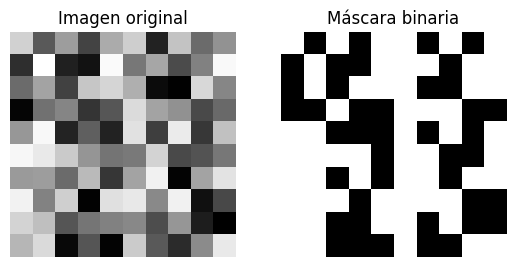

In [6]:
import numpy as np
import matplotlib.pyplot as plt


'''
Imagen de prueba simple hecha con valores aleatorios de 0 a 255 con un tamaño de 10x10 pixeles.
'''
imagen_simulada = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)


'''
Usamos clase creada anteriormente para analizar la imagen
'''
analizador = AnalizadorImagen(imagen_simulada)


'''
Calculamos las estadísticas de la imagen
'''
estadisticas = analizador.calcular_estadisticas()
print("Estadísticas de la imagen:")
print(estadisticas)

'''
Generamos una máscara binaria a partir de un umbral
'''
mascara = analizador.generar_mascara_binaria(umbral=120)
print("\nImagen original:")
print(imagen_simulada)
print("\nMáscara binaria:")
print(mascara)

plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(imagen_simulada, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Máscara binaria")
plt.imshow(mascara, cmap='gray')
plt.axis('off')

plt.show()


### Punto 2: Diseño de Filtro Personalizado por Convolución

En lugar de utilizar los filtros predefinidos de OpenCV, usted debe diseñar y aplicar un **kernel de convolución personalizado** para la detección de bordes diagonales.

1.  **Diseño del Kernel**:
    *   Cree un kernel de NumPy de 3x3 que resalte los bordes en la dirección diagonal principal (de arriba-izquierda a abajo-derecha).
    *   Explique brevemente por qué la estructura de pesos de su kernel logra este efecto.
2.  **Aplicación del Filtro**:
    *   Cargue la imagen `einstein.jpg` en escala de grises.
    *   Aplique su kernel personalizado a la imagen utilizando la función `cv2.filter2D()`.
3.  **Visualización**:
    *   Muestre la imagen original y el resultado de su filtro lado a lado.


| -2 | -1 | 0 |
|----|----|----|
| -1 | 0 | 1 |
| 0 | 1 | 2 |


Se eligio esa representacion matricial ya que al probar se ve que llega a una aproximacion muy buena.

Los pesos del kernel ([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]) están organizados para medir el cambio de intensidad a lo largo de la diagonal principal. Los valores negativos en la parte superior izquierda y los positivos en la inferior derecha hacen que, al aplicarse, el filtro reste las intensidades de ambos lados de esa diagonal: si la imagen se vuelve más clara en esa dirección, la suma será positiva, y si se oscurece, será negativa. Los coeficientes crecientes (2, 1, 0, 1, 2) ponderan más los píxeles más alejados del centro, lo que mejora la sensibilidad al gradiente y reduce el ruido. En conjunto, este patrón de signos y pesos aproxima una derivada direccional que resalta los bordes diagonales de arriba-izquierda a abajo-derecha.


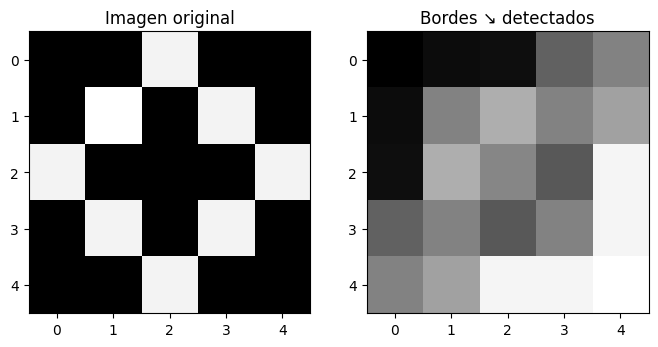

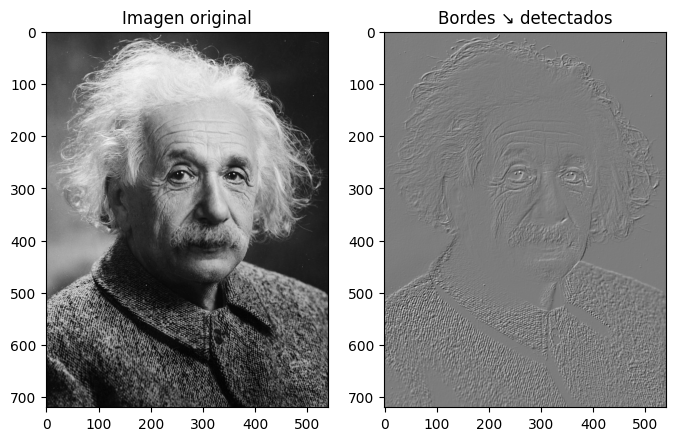

In [17]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import cv2


'''
kernel de deteccion diagonal, usamos -2 para deteccion de puntos mas oscuros, -1 puntos intermedios y 0 una referencia o neutral
'''
kernel_diag = np.array([
 [-2, -1,  0],
 [-1,  0,  1],
 [ 0,  1,  2]
])

'''
Cargamos la imagen y la convertimos a escala de grises
'''
img = cv2.imread('einstein.jpg', cv2.IMREAD_GRAYSCALE)

'''
Convertimos a float32 para que no se pierda informacion y podamos operar
'''
img_float = np.float32(img)

'''
Aplicamos el kernel a la imagen con funcion filter2d que genera una convolucion entre la imagen de einsteein y el kernel
'''
imagen_filtrada = cv2.filter2D(src=img_float, ddepth=-1, kernel = kernel_diag )

'''
Imagen de prueba simple hecha con valores aleatorios de 0 a 255 con un tamaño de 5x5 pixeles.
'''
imagen = np.array([
    [ 10,  10,  50,  10,  10],
    [ 10,  52,  10,  50,  10],
    [ 50,  10, 10,  10,  50],
    [ 10,  50,  10,  50,  10],
    [ 10,  10,  50,  10,  10]
], dtype=float)

'''
Aplicamos el kernel a la imagen con scipy.signal.convolve2d que genera una convolucion entre la imagen aleatoria y el kernel unicamente como muestra
'''
resultado = convolve2d(imagen, kernel_diag, mode='same', boundary='fill', fillvalue=0)

'''
Ploteo de resultados
'''
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(imagen, cmap='gray')
axs[0].set_title("Imagen original")
axs[1].imshow(resultado, cmap='gray')
axs[1].set_title("Bordes ↘️ detectados")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(8,5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Imagen original")
axs[1].imshow(imagen_filtrada, cmap='gray')
axs[1].set_title("Bordes ↘️ detectados")
plt.show()

### Punto 3: Limpieza de Imagen con Transformaciones Morfológicas

Se proporciona una imagen binaria (`fingerprint.jpg`) que contiene una huella dactilar con "cortes" (ruido negro) en las crestas y "puntos" (ruido blanco) en los valles. Su tarea es limpiar esta imagen para obtener crestas continuas y valles limpios.

1.  **Cargue la imagen** `fingerprint.jpg` y asegúrese de que esté en formato binario (blanco y negro).
2.  **Diseñe y aplique una secuencia de transformaciones morfológicas** (erosión, dilatación, apertura, cierre) para lograr los siguientes objetivos:
    *   Eliminar los pequeños puntos blancos en las áreas negras.
    *   Conectar las líneas de las crestas que están rotas.
3.  **Justifique su elección**: Explique por qué eligió cada operación y en qué orden las aplicó para obtener el resultado deseado.
4.  **Muestre el resultado final** junto a la imagen original ruidosa.

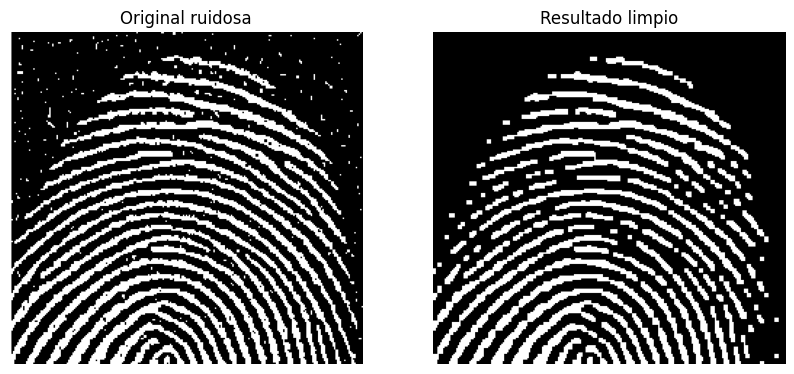

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

'''Cargar imagen en escala de gris'''
img = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)

'''Se hace un codigo para que todo pixel tome 0 o 255 y no hayan valores entre medios y asimejorar la precision en este caso se tiene un umbral de brillo de 127'''
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

'''Creacion del kernel '''
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

'''aplicamos apertura que ayuda a eliminar puntos blancos mas abajo se explica porque'''
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

''' Aplicacion de cierre para generar completado de areas blancas faltantes'''
cleaned = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 5️⃣ Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original ruidosa")
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Resultado limpio")
plt.imshow(cleaned, cmap='gray')
plt.axis('off')

plt.show()


- Apertura: La erosión borra píxeles blancos aislados y la dilatación restaura las estructuras más grandes (Elimina pequeños puntos blancos en zonas negras).
- Cierre: La dilatación extiende las crestas, luego la erosión devuelve su grosor original(Rellena huecos negros y une crestas interrumpidas)


### Punto 4: Segmentación de Múltiples Colores

Utilizando la imagen de las bolas de colores proporcionada (`colored_balls.png`), su tarea es segmentar y aislar únicamente las bolas de color **naranja, rosado y amarillo**.

1.  **Cargue la imagen** y analice sus características de color.
2.  **Seleccione el espacio de color** que considere más adecuado para esta tarea y **justifique** por qué es superior a otros (como BGR) para la segmentación por color en este escenario. Convierta la imagen a este espacio.
3.  **Defina los rangos de color** necesarios para identificar los píxeles correspondientes a los colores naranja, rosado y amarillo. Deberá crear una máscara para cada color.
4.  **Combine las máscaras** individuales en una sola máscara final que contenga todos los objetos de los tres colores de interés.
5.  **Aplique la máscara combinada** a la imagen original para mostrar únicamente las bolas de los colores seleccionados sobre un fondo negro.
6.  **Muestre los resultados**: Presente la imagen original, la máscara combinada final y el resultado de la segmentación.

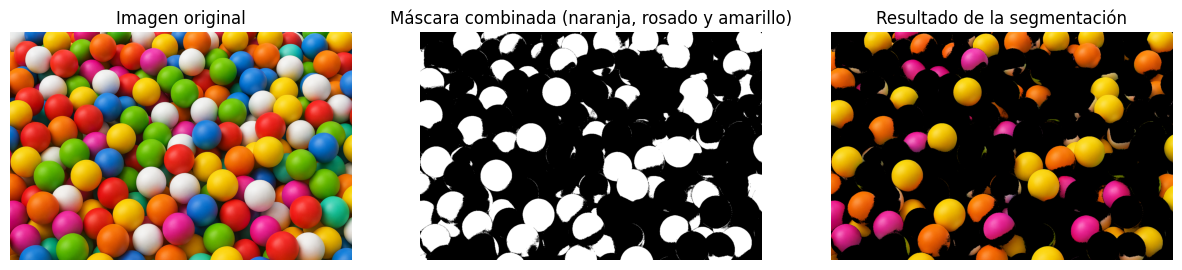

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

'''Cargar la imagen en escala de grises'''
img = cv2.imread('colored_balls.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

'''Convertir la imagen al espacio de color HSV'''
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



'''Definir los rangos de color (en HSV)'''
# Naranja
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([25, 255, 255])

# Rosado
lower_pink = np.array([140, 50, 100])
upper_pink = np.array([170, 255, 255])

# Amarillo
lower_yellow = np.array([25, 100, 100])
upper_yellow = np.array([35, 255, 255])

'''Crear máscaras individuales'''
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

'''Combinar las máscaras en una sola'''
combined_mask = cv2.bitwise_or(mask_orange, mask_pink)
combined_mask = cv2.bitwise_or(combined_mask, mask_yellow)

'''Aplicar la máscara combinada a la imagen original'''
result = cv2.bitwise_and(img_rgb, img_rgb, mask=combined_mask)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(combined_mask, cmap='gray')
plt.title("Máscara combinada (naranja, rosado y amarillo)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(result)
plt.title("Resultado de la segmentación")
plt.axis("off")

plt.show()


### Punto 5: Detección y Conteo de Objetos mediante Contornos

El objetivo de este punto es desarrollar un script que cuente el número de objetos en la imagen `circles.png`. Para ello, debe combinar varias de las técnicas vistas en clase.

1.  **Cargue la imagen `circles.png`** y conviértala a escala de grises.
2.  **Binarice la imagen**: Utilice el **método de Otsu** para encontrar un umbral óptimo y segmentar los círculos del fondo.
3.  **Limpieza de la máscara**: Es posible que la binarización no sea perfecta. Aplique la operación morfológica que considere más adecuada (apertura o cierre) para eliminar posibles ruidos (pequeños puntos negros o blancos). Justifique su elección.
4.  **Encuentre los contornos**: Utilice `cv2.findContours()` sobre la imagen binaria limpia para detectar cada objeto individualmente.
5.  **Dibuje y cuente**:
    *   Dibuje todos los contornos encontrados sobre la imagen original a color (cárguela de nuevo para no dibujar sobre la versión gris). Use un color visible (ej: verde) y un grosor de línea de 2.
    *   Imprima en la consola el número total de contornos detectados.
    *   Muestre la imagen final con los contornos dibujados.

Número de objetos detectados: 164


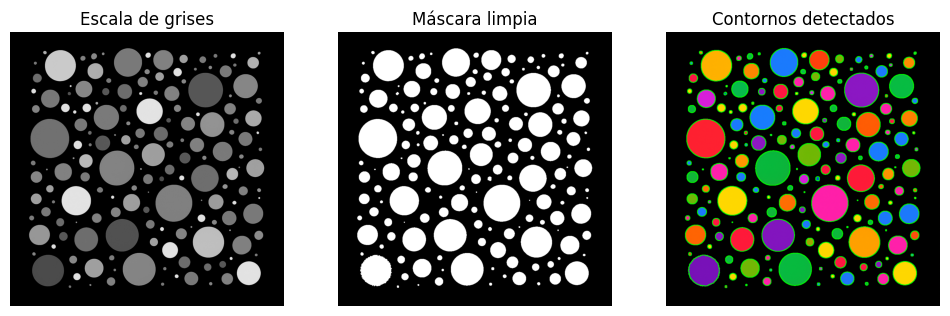

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


imagen_color = cv2.imread('circles.png')
gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

'''Binarización usando el método de Otsu'''
_, binaria = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

'''Limpieza de puntos blancos'''
kernel = np.ones((3,3), np.uint8)
binaria_limpia = cv2.morphologyEx(binaria, cv2.MORPH_OPEN, kernel)

''' Encontrar contornos
    cv2.RETR_EXTERNAL solo devuelve los contornos externos '''
contornos, _ = cv2.findContours(binaria_limpia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

'''Dibujar los contornos sobre la imagen original'''
imagen_contornos = imagen_color.copy()
cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 2)

'''Contar contornos'''
print(f"Número de objetos detectados: {len(contornos)}")


plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gris, cmap='gray'); plt.title('Escala de grises'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(binaria_limpia, cmap='gray'); plt.title('Máscara limpia'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB)); plt.title('Contornos detectados'); plt.axis('off')
plt.show()
